In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np
#Set some numpy print options for displaying numpy arrays to fit maximum width of cell
np.set_printoptions(precision=8, edgeitems=30, linewidth=1000,formatter=dict(float=lambda x: "%.8g" % x))

import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [6]:
#load Dataset
data = pd.read_csv('data/2016_EGLL_Testdata_cleaned.csv', parse_dates = ['Landing_Time'], infer_datetime_format = True)
data.head()

,Landing_Time,hourofday,aircraft_registration,wind_direction_degrees,Wind_Speed_kt,Wind_And_Gust_kt,Landing_RVR_or_Vis_m,temperature_c,dew_point_c,relative_humidity,pressure_altimiter_in,RunwayTrueTrack,Landing_Visibilty_Class_RVR,present_weather_codes,Landing_RWY
0,2016-01-01 04:34:38,4,GXLEJ,NaN,1.0,1.0,6000.0,2.0,1.0,93.08,30.21,89.713523,VMC,NaN,RW09R
1,2016-01-01 04:38:22,4,GSTBH,NaN,1.0,1.0,6000.0,2.0,1.0,93.08,30.21,89.713523,VMC,NaN,RW09R
2,2016-01-01 04:40:38,4,GCIVH,110.0,1.0,1.0,6000.0,2.0,1.0,93.08,30.21,89.713523,VMC,NaN,RW09R
3,2016-01-01 04:42:36,4,GVYUM,110.0,1.0,1.0,6000.0,2.0,1.0,93.08,30.21,89.713523,VMC,NaN,RW09R
4,2016-01-01 04:44:43,4,GBYGB,110.0,1.0,1.0,6000.0,2.0,1.0,93.08,30.21,89.713523,VMC,NaN,RW09R


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220940 entries, 0 to 220939
Data columns (total 15 columns):
Landing_Time                   220940 non-null datetime64[ns]
hourofday                      220940 non-null int64
aircraft_registration          220799 non-null object
wind_direction_degrees         203226 non-null float64
Wind_Speed_kt                  220940 non-null float64
Wind_And_Gust_kt               220940 non-null float64
Landing_RVR_or_Vis_m           220940 non-null float64
temperature_c                  220940 non-null float64
dew_point_c                    220940 non-null float64
relative_humidity              220940 non-null float64
pressure_altimiter_in          220940 non-null float64
RunwayTrueTrack                220940 non-null float64
Landing_Visibilty_Class_RVR    220940 non-null object
present_weather_codes          33015 non-null object
Landing_RWY                    220940 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(4)
memor

In [8]:
# One-Hot Encoding Categorical Variables
data.set_index('Landing_Time',inplace = True)
data.drop(columns=['aircraft_registration'],inplace = True)
data = pd.get_dummies(data, columns=['Landing_Visibilty_Class_RVR', 'present_weather_codes'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220940 entries, 2016-01-01 04:34:38 to 2016-12-30 23:57:49
Data columns (total 65 columns):
hourofday                                   220940 non-null int64
wind_direction_degrees                      203226 non-null float64
Wind_Speed_kt                               220940 non-null float64
Wind_And_Gust_kt                            220940 non-null float64
Landing_RVR_or_Vis_m                        220940 non-null float64
temperature_c                               220940 non-null float64
dew_point_c                                 220940 non-null float64
relative_humidity                           220940 non-null float64
pressure_altimiter_in                       220940 non-null float64
RunwayTrueTrack                             220940 non-null float64
Landing_RWY                                 220940 non-null object
Landing_Visibilty_Class_RVR_CAT1            220940 non-null uint8
Landing_Visibilty_Class_RVR_CAT2            

In [10]:
data[data.isnull().any(axis=1)]

,hourofday,wind_direction_degrees,Wind_Speed_kt,Wind_And_Gust_kt,Landing_RVR_or_Vis_m,temperature_c,dew_point_c,relative_humidity,pressure_altimiter_in,RunwayTrueTrack,...,present_weather_codes_SHRA,present_weather_codes_SHRA HZ,present_weather_codes_SHRA VCTS,present_weather_codes_TS,present_weather_codes_TSRA,present_weather_codes_VCFG,present_weather_codes_VCSH,present_weather_codes_VCTS,present_weather_codes_VCTS -SHRA,present_weather_codes_VCTS VCSH
Landing_Time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 04:34:38,4,NaN,1.0,1.0,6000.0,2.0,1.0,93.08,30.21,89.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-01 04:38:22,4,NaN,1.0,1.0,6000.0,2.0,1.0,93.08,30.21,89.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-04 06:10:11,6,NaN,7.0,7.0,10000.0,6.0,5.0,93.30,29.03,269.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-04 06:10:50,6,NaN,7.0,7.0,10000.0,6.0,5.0,93.30,29.03,269.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-04 06:12:36,6,NaN,7.0,7.0,10000.0,6.0,5.0,93.30,29.03,269.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-04 06:13:39,6,NaN,7.0,7.0,10000.0,6.0,5.0,93.30,29.03,269.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-04 06:15:03,6,NaN,7.0,7.0,10000.0,6.0,5.0,93.30,29.03,269.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-04 06:16:04,6,NaN,7.0,7.0,10000.0,6.0,5.0,93.30,29.03,269.713523,...,0,0,0,0,0,0,0,0,0,0
2016-01-04 06:17:32,6,NaN,7.0,7.0,10000.0,6.0,5.0,93.30,29.03,269.713523,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203226 entries, 2016-01-01 04:40:38 to 2016-12-30 23:57:49
Data columns (total 65 columns):
hourofday                                   203226 non-null int64
wind_direction_degrees                      203226 non-null float64
Wind_Speed_kt                               203226 non-null float64
Wind_And_Gust_kt                            203226 non-null float64
Landing_RVR_or_Vis_m                        203226 non-null float64
temperature_c                               203226 non-null float64
dew_point_c                                 203226 non-null float64
relative_humidity                           203226 non-null float64
pressure_altimiter_in                       203226 non-null float64
RunwayTrueTrack                             203226 non-null float64
Landing_RWY                                 203226 non-null object
Landing_Visibilty_Class_RVR_CAT1            203226 non-null uint8
Landing_Visibilty_Class_RVR_CAT2            

In [12]:
# One Hot Encode categorical variable output
encoder = LabelEncoder()
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))

In [13]:
data_for_output = data.copy()
X_data = data_for_output.drop('Landing_RWY', axis=1)
X_data = scaler.fit_transform(X_data.values)
y = data_for_output.Landing_RWY

# encode class values as integers
encoded_Y = encoder.fit(y).transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
y_data = np_utils.to_categorical(encoded_Y)

In [14]:
print(encoded_Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 ... 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [15]:
# print(y_data)

In [16]:
#Split the dataset into train and Test
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size, random_state=seed)
print('Shape of train data:',X_train.shape, y_train.shape)
print('Shape of test data:',X_test.shape, y_test.shape)

Shape of train data: (142258, 64) (142258, 4)
Shape of test data: (60968, 64) (60968, 4)


In [17]:
# print(X_train)
# print(X_test)
# print(y_test)
# print(y_train)

In [18]:
# define baseline model
def baseline_model():
    # Create Model
    model = Sequential()
    model.add(Dense(64, input_dim=64, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

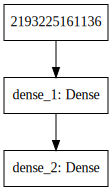

In [19]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
# Visualize Model
model = baseline_model()
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [20]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=1000, batch_size=32, verbose=2)

In [21]:
# Perform K-Fold cross Validation
kfold = KFold(n_splits=2, shuffle=True, random_state=seed)
kfold

KFold(n_splits=2, random_state=42, shuffle=True)

In [22]:
%%time
import time
print("Begin K-Fold Cross Validation..")
search_time_start = time.time()
results = cross_val_score(estimator, X_data, y_data, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print("MLP K-Fold Cross Validation Simulation time:", time.time() - search_time_start)

Begin K-Fold Cross Validation..
Epoch 1/1000
 - 7s - loss: 0.5936 - acc: 0.6332
Epoch 2/1000
 - 6s - loss: 0.5565 - acc: 0.6527
Epoch 3/1000
 - 5s - loss: 0.5519 - acc: 0.6646
Epoch 4/1000
 - 6s - loss: 0.5484 - acc: 0.6695
Epoch 5/1000
 - 5s - loss: 0.5454 - acc: 0.6732
Epoch 6/1000
 - 4s - loss: 0.5422 - acc: 0.6774
Epoch 7/1000
 - 5s - loss: 0.5402 - acc: 0.6799
Epoch 8/1000
 - 5s - loss: 0.5379 - acc: 0.6825
Epoch 9/1000
 - 5s - loss: 0.5358 - acc: 0.6854
Epoch 10/1000
 - 5s - loss: 0.5343 - acc: 0.6881
Epoch 11/1000
 - 5s - loss: 0.5327 - acc: 0.6914
Epoch 12/1000
 - 5s - loss: 0.5317 - acc: 0.6908
Epoch 13/1000
 - 5s - loss: 0.5305 - acc: 0.6918
Epoch 14/1000
 - 6s - loss: 0.5290 - acc: 0.6951
Epoch 15/1000
 - 7s - loss: 0.5276 - acc: 0.6963
Epoch 16/1000
 - 6s - loss: 0.5269 - acc: 0.6978
Epoch 17/1000
 - 5s - loss: 0.5256 - acc: 0.6977
Epoch 18/1000
 - 3s - loss: 0.5242 - acc: 0.6992
Epoch 19/1000
 - 3s - loss: 0.5228 - acc: 0.7018
Epoch 20/1000
 - 4s - loss: 0.5218 - acc: 0.70

Epoch 167/1000
 - 3s - loss: 0.4744 - acc: 0.7503
Epoch 168/1000
 - 3s - loss: 0.4737 - acc: 0.7519
Epoch 169/1000
 - 3s - loss: 0.4744 - acc: 0.7514
Epoch 170/1000
 - 4s - loss: 0.4738 - acc: 0.7521
Epoch 171/1000
 - 5s - loss: 0.4738 - acc: 0.7516
Epoch 172/1000
 - 5s - loss: 0.4745 - acc: 0.7507
Epoch 173/1000
 - 4s - loss: 0.4738 - acc: 0.7501
Epoch 174/1000
 - 4s - loss: 0.4736 - acc: 0.7508
Epoch 175/1000
 - 4s - loss: 0.4739 - acc: 0.7509
Epoch 176/1000
 - 4s - loss: 0.4739 - acc: 0.7512
Epoch 177/1000
 - 3s - loss: 0.4736 - acc: 0.7519
Epoch 178/1000
 - 3s - loss: 0.4742 - acc: 0.7507
Epoch 179/1000
 - 3s - loss: 0.4736 - acc: 0.7508
Epoch 180/1000
 - 3s - loss: 0.4733 - acc: 0.7521
Epoch 181/1000
 - 3s - loss: 0.4735 - acc: 0.7511
Epoch 182/1000
 - 3s - loss: 0.4731 - acc: 0.7525
Epoch 183/1000
 - 3s - loss: 0.4735 - acc: 0.7510
Epoch 184/1000
 - 3s - loss: 0.4730 - acc: 0.7520
Epoch 185/1000
 - 3s - loss: 0.4734 - acc: 0.7513
Epoch 186/1000
 - 3s - loss: 0.4729 - acc: 0.7520


Epoch 331/1000
 - 3s - loss: 0.4664 - acc: 0.7579
Epoch 332/1000
 - 3s - loss: 0.4660 - acc: 0.7577
Epoch 333/1000
 - 3s - loss: 0.4658 - acc: 0.7582
Epoch 334/1000
 - 4s - loss: 0.4657 - acc: 0.7598
Epoch 335/1000
 - 3s - loss: 0.4660 - acc: 0.7587
Epoch 336/1000
 - 3s - loss: 0.4657 - acc: 0.7587
Epoch 337/1000
 - 3s - loss: 0.4655 - acc: 0.7589
Epoch 338/1000
 - 3s - loss: 0.4666 - acc: 0.7583
Epoch 339/1000
 - 3s - loss: 0.4652 - acc: 0.7593
Epoch 340/1000
 - 3s - loss: 0.4655 - acc: 0.7598
Epoch 341/1000
 - 3s - loss: 0.4655 - acc: 0.7583
Epoch 342/1000
 - 3s - loss: 0.4657 - acc: 0.7584
Epoch 343/1000
 - 3s - loss: 0.4652 - acc: 0.7581
Epoch 344/1000
 - 3s - loss: 0.4650 - acc: 0.7598
Epoch 345/1000
 - 3s - loss: 0.4652 - acc: 0.7592
Epoch 346/1000
 - 3s - loss: 0.4650 - acc: 0.7590
Epoch 347/1000
 - 3s - loss: 0.4658 - acc: 0.7588
Epoch 348/1000
 - 3s - loss: 0.4656 - acc: 0.7590
Epoch 349/1000
 - 3s - loss: 0.4657 - acc: 0.7589
Epoch 350/1000
 - 3s - loss: 0.4655 - acc: 0.7582


Epoch 495/1000
 - 3s - loss: 0.4606 - acc: 0.7645
Epoch 496/1000
 - 4s - loss: 0.4612 - acc: 0.7628
Epoch 497/1000
 - 3s - loss: 0.4608 - acc: 0.7641
Epoch 498/1000
 - 3s - loss: 0.4604 - acc: 0.7633
Epoch 499/1000
 - 3s - loss: 0.4608 - acc: 0.7630
Epoch 500/1000
 - 3s - loss: 0.4603 - acc: 0.7630
Epoch 501/1000
 - 3s - loss: 0.4599 - acc: 0.7648
Epoch 502/1000
 - 3s - loss: 0.4604 - acc: 0.7634
Epoch 503/1000
 - 3s - loss: 0.4605 - acc: 0.7639
Epoch 504/1000
 - 3s - loss: 0.4608 - acc: 0.7634
Epoch 505/1000
 - 3s - loss: 0.4602 - acc: 0.7644
Epoch 506/1000
 - 3s - loss: 0.4605 - acc: 0.7630
Epoch 507/1000
 - 3s - loss: 0.4608 - acc: 0.7641
Epoch 508/1000
 - 3s - loss: 0.4601 - acc: 0.7644
Epoch 509/1000
 - 3s - loss: 0.4600 - acc: 0.7649
Epoch 510/1000
 - 3s - loss: 0.4607 - acc: 0.7633
Epoch 511/1000
 - 3s - loss: 0.4600 - acc: 0.7648
Epoch 512/1000
 - 4s - loss: 0.4605 - acc: 0.7626
Epoch 513/1000
 - 3s - loss: 0.4598 - acc: 0.7647
Epoch 514/1000
 - 3s - loss: 0.4595 - acc: 0.7645


Epoch 659/1000
 - 5s - loss: 0.4563 - acc: 0.7663
Epoch 660/1000
 - 3s - loss: 0.4571 - acc: 0.7658
Epoch 661/1000
 - 3s - loss: 0.4574 - acc: 0.7661
Epoch 662/1000
 - 3s - loss: 0.4563 - acc: 0.7669
Epoch 663/1000
 - 3s - loss: 0.4570 - acc: 0.7653
Epoch 664/1000
 - 3s - loss: 0.4569 - acc: 0.7671
Epoch 665/1000
 - 3s - loss: 0.4567 - acc: 0.7671
Epoch 666/1000
 - 3s - loss: 0.4570 - acc: 0.7661
Epoch 667/1000
 - 3s - loss: 0.4571 - acc: 0.7662
Epoch 668/1000
 - 3s - loss: 0.4572 - acc: 0.7667
Epoch 669/1000
 - 3s - loss: 0.4563 - acc: 0.7679
Epoch 670/1000
 - 3s - loss: 0.4563 - acc: 0.7680
Epoch 671/1000
 - 3s - loss: 0.4563 - acc: 0.7662
Epoch 672/1000
 - 3s - loss: 0.4569 - acc: 0.7669
Epoch 673/1000
 - 3s - loss: 0.4562 - acc: 0.7668
Epoch 674/1000
 - 3s - loss: 0.4565 - acc: 0.7661
Epoch 675/1000
 - 3s - loss: 0.4567 - acc: 0.7668
Epoch 676/1000
 - 3s - loss: 0.4559 - acc: 0.7674
Epoch 677/1000
 - 4s - loss: 0.4561 - acc: 0.7671
Epoch 678/1000
 - 4s - loss: 0.4566 - acc: 0.7668


Epoch 823/1000
 - 3s - loss: 0.4549 - acc: 0.7689
Epoch 824/1000
 - 3s - loss: 0.4544 - acc: 0.7690
Epoch 825/1000
 - 3s - loss: 0.4544 - acc: 0.7702
Epoch 826/1000
 - 3s - loss: 0.4547 - acc: 0.7690
Epoch 827/1000
 - 3s - loss: 0.4539 - acc: 0.7696
Epoch 828/1000
 - 3s - loss: 0.4546 - acc: 0.7690
Epoch 829/1000
 - 3s - loss: 0.4541 - acc: 0.7699
Epoch 830/1000
 - 3s - loss: 0.4541 - acc: 0.7696
Epoch 831/1000
 - 3s - loss: 0.4545 - acc: 0.7695
Epoch 832/1000
 - 3s - loss: 0.4545 - acc: 0.7690
Epoch 833/1000
 - 3s - loss: 0.4543 - acc: 0.7686
Epoch 834/1000
 - 3s - loss: 0.4547 - acc: 0.7675
Epoch 835/1000
 - 3s - loss: 0.4539 - acc: 0.7687
Epoch 836/1000
 - 3s - loss: 0.4544 - acc: 0.7689
Epoch 837/1000
 - 3s - loss: 0.4546 - acc: 0.7695
Epoch 838/1000
 - 3s - loss: 0.4546 - acc: 0.7691
Epoch 839/1000
 - 3s - loss: 0.4548 - acc: 0.7687
Epoch 840/1000
 - 3s - loss: 0.4546 - acc: 0.7679
Epoch 841/1000
 - 3s - loss: 0.4541 - acc: 0.7689
Epoch 842/1000
 - 3s - loss: 0.4536 - acc: 0.7699


Epoch 987/1000
 - 3s - loss: 0.4525 - acc: 0.7708
Epoch 988/1000
 - 3s - loss: 0.4526 - acc: 0.7706
Epoch 989/1000
 - 3s - loss: 0.4526 - acc: 0.7728
Epoch 990/1000
 - 3s - loss: 0.4528 - acc: 0.7707
Epoch 991/1000
 - 3s - loss: 0.4527 - acc: 0.7721
Epoch 992/1000
 - 3s - loss: 0.4524 - acc: 0.7721
Epoch 993/1000
 - 3s - loss: 0.4531 - acc: 0.7712
Epoch 994/1000
 - 3s - loss: 0.4524 - acc: 0.7717
Epoch 995/1000
 - 3s - loss: 0.4526 - acc: 0.7717
Epoch 996/1000
 - 3s - loss: 0.4530 - acc: 0.7703
Epoch 997/1000
 - 4s - loss: 0.4532 - acc: 0.7716
Epoch 998/1000
 - 4s - loss: 0.4523 - acc: 0.7713
Epoch 999/1000
 - 3s - loss: 0.4530 - acc: 0.7718
Epoch 1000/1000
 - 3s - loss: 0.4528 - acc: 0.7721
Epoch 1/1000
 - 3s - loss: 0.5909 - acc: 0.6328
Epoch 2/1000
 - 4s - loss: 0.5560 - acc: 0.6439
Epoch 3/1000
 - 3s - loss: 0.5524 - acc: 0.6505
Epoch 4/1000
 - 3s - loss: 0.5488 - acc: 0.6597
Epoch 5/1000
 - 3s - loss: 0.5457 - acc: 0.6647
Epoch 6/1000
 - 3s - loss: 0.5437 - acc: 0.6672
Epoch 7/100

Epoch 153/1000
 - 3s - loss: 0.4731 - acc: 0.7541
Epoch 154/1000
 - 3s - loss: 0.4729 - acc: 0.7533
Epoch 155/1000
 - 3s - loss: 0.4722 - acc: 0.7556
Epoch 156/1000
 - 3s - loss: 0.4725 - acc: 0.7551
Epoch 157/1000
 - 3s - loss: 0.4719 - acc: 0.7550
Epoch 158/1000
 - 3s - loss: 0.4717 - acc: 0.7542
Epoch 159/1000
 - 3s - loss: 0.4716 - acc: 0.7554
Epoch 160/1000
 - 3s - loss: 0.4717 - acc: 0.7539
Epoch 161/1000
 - 4s - loss: 0.4718 - acc: 0.7544
Epoch 162/1000
 - 3s - loss: 0.4716 - acc: 0.7556
Epoch 163/1000
 - 3s - loss: 0.4711 - acc: 0.7547
Epoch 164/1000
 - 3s - loss: 0.4714 - acc: 0.7556
Epoch 165/1000
 - 3s - loss: 0.4709 - acc: 0.7565
Epoch 166/1000
 - 3s - loss: 0.4708 - acc: 0.7556
Epoch 167/1000
 - 3s - loss: 0.4711 - acc: 0.7548
Epoch 168/1000
 - 3s - loss: 0.4700 - acc: 0.7543
Epoch 169/1000
 - 3s - loss: 0.4700 - acc: 0.7564
Epoch 170/1000
 - 3s - loss: 0.4699 - acc: 0.7558
Epoch 171/1000
 - 3s - loss: 0.4695 - acc: 0.7565
Epoch 172/1000
 - 3s - loss: 0.4700 - acc: 0.7556


Epoch 317/1000
 - 12s - loss: 0.4588 - acc: 0.7651
Epoch 318/1000
 - 14s - loss: 0.4586 - acc: 0.7650
Epoch 319/1000
 - 13s - loss: 0.4585 - acc: 0.7646
Epoch 320/1000
 - 13s - loss: 0.4587 - acc: 0.7646
Epoch 321/1000
 - 14s - loss: 0.4590 - acc: 0.7654
Epoch 322/1000
 - 13s - loss: 0.4587 - acc: 0.7631
Epoch 323/1000
 - 14s - loss: 0.4587 - acc: 0.7644
Epoch 324/1000
 - 13s - loss: 0.4581 - acc: 0.7650
Epoch 325/1000
 - 14s - loss: 0.4583 - acc: 0.7647
Epoch 326/1000
 - 13s - loss: 0.4584 - acc: 0.7649
Epoch 327/1000
 - 12s - loss: 0.4584 - acc: 0.7652
Epoch 328/1000
 - 14s - loss: 0.4581 - acc: 0.7650
Epoch 329/1000
 - 11s - loss: 0.4584 - acc: 0.7658
Epoch 330/1000
 - 4s - loss: 0.4582 - acc: 0.7642
Epoch 331/1000
 - 3s - loss: 0.4584 - acc: 0.7651
Epoch 332/1000
 - 3s - loss: 0.4581 - acc: 0.7640
Epoch 333/1000
 - 3s - loss: 0.4586 - acc: 0.7638
Epoch 334/1000
 - 3s - loss: 0.4582 - acc: 0.7646
Epoch 335/1000
 - 3s - loss: 0.4578 - acc: 0.7658
Epoch 336/1000
 - 3s - loss: 0.4580 -

Epoch 481/1000
 - 3s - loss: 0.4546 - acc: 0.7682
Epoch 482/1000
 - 3s - loss: 0.4544 - acc: 0.7690
Epoch 483/1000
 - 3s - loss: 0.4542 - acc: 0.7684
Epoch 484/1000
 - 3s - loss: 0.4538 - acc: 0.7674
Epoch 485/1000
 - 3s - loss: 0.4540 - acc: 0.7692
Epoch 486/1000
 - 3s - loss: 0.4540 - acc: 0.7680
Epoch 487/1000
 - 3s - loss: 0.4541 - acc: 0.7687
Epoch 488/1000
 - 3s - loss: 0.4538 - acc: 0.7686
Epoch 489/1000
 - 3s - loss: 0.4546 - acc: 0.7681
Epoch 490/1000
 - 3s - loss: 0.4538 - acc: 0.7678
Epoch 491/1000
 - 3s - loss: 0.4546 - acc: 0.7671
Epoch 492/1000
 - 3s - loss: 0.4539 - acc: 0.7688
Epoch 493/1000
 - 3s - loss: 0.4539 - acc: 0.7684
Epoch 494/1000
 - 3s - loss: 0.4542 - acc: 0.7677
Epoch 495/1000
 - 4s - loss: 0.4540 - acc: 0.7690
Epoch 496/1000
 - 3s - loss: 0.4539 - acc: 0.7682
Epoch 497/1000
 - 3s - loss: 0.4541 - acc: 0.7670
Epoch 498/1000
 - 3s - loss: 0.4537 - acc: 0.7692
Epoch 499/1000
 - 3s - loss: 0.4537 - acc: 0.7691
Epoch 500/1000
 - 3s - loss: 0.4541 - acc: 0.7681


Epoch 645/1000
 - 3s - loss: 0.4510 - acc: 0.7728
Epoch 646/1000
 - 3s - loss: 0.4512 - acc: 0.7726
Epoch 647/1000
 - 4s - loss: 0.4512 - acc: 0.7717
Epoch 648/1000
 - 3s - loss: 0.4505 - acc: 0.7736
Epoch 649/1000
 - 4s - loss: 0.4515 - acc: 0.7725
Epoch 650/1000
 - 4s - loss: 0.4509 - acc: 0.7723
Epoch 651/1000
 - 5s - loss: 0.4505 - acc: 0.7730
Epoch 652/1000
 - 4s - loss: 0.4510 - acc: 0.7724
Epoch 653/1000
 - 4s - loss: 0.4513 - acc: 0.7718
Epoch 654/1000
 - 3s - loss: 0.4510 - acc: 0.7725
Epoch 655/1000
 - 3s - loss: 0.4510 - acc: 0.7723
Epoch 656/1000
 - 3s - loss: 0.4509 - acc: 0.7711
Epoch 657/1000
 - 3s - loss: 0.4511 - acc: 0.7716
Epoch 658/1000
 - 3s - loss: 0.4510 - acc: 0.7715
Epoch 659/1000
 - 3s - loss: 0.4511 - acc: 0.7722
Epoch 660/1000
 - 3s - loss: 0.4506 - acc: 0.7719
Epoch 661/1000
 - 3s - loss: 0.4513 - acc: 0.7736
Epoch 662/1000
 - 3s - loss: 0.4510 - acc: 0.7722
Epoch 663/1000
 - 3s - loss: 0.4513 - acc: 0.7715
Epoch 664/1000
 - 3s - loss: 0.4508 - acc: 0.7716


Epoch 809/1000
 - 3s - loss: 0.4494 - acc: 0.7731
Epoch 810/1000
 - 3s - loss: 0.4493 - acc: 0.7740
Epoch 811/1000
 - 3s - loss: 0.4495 - acc: 0.7740
Epoch 812/1000
 - 3s - loss: 0.4490 - acc: 0.7737
Epoch 813/1000
 - 3s - loss: 0.4490 - acc: 0.7748
Epoch 814/1000
 - 3s - loss: 0.4495 - acc: 0.7731
Epoch 815/1000
 - 3s - loss: 0.4498 - acc: 0.7739
Epoch 816/1000
 - 3s - loss: 0.4489 - acc: 0.7734
Epoch 817/1000
 - 3s - loss: 0.4488 - acc: 0.7727
Epoch 818/1000
 - 3s - loss: 0.4490 - acc: 0.7740
Epoch 819/1000
 - 3s - loss: 0.4496 - acc: 0.7738
Epoch 820/1000
 - 3s - loss: 0.4494 - acc: 0.7730
Epoch 821/1000
 - 3s - loss: 0.4490 - acc: 0.7743
Epoch 822/1000
 - 3s - loss: 0.4486 - acc: 0.7745
Epoch 823/1000
 - 3s - loss: 0.4489 - acc: 0.7737
Epoch 824/1000
 - 3s - loss: 0.4489 - acc: 0.7740
Epoch 825/1000
 - 3s - loss: 0.4492 - acc: 0.7733
Epoch 826/1000
 - 3s - loss: 0.4490 - acc: 0.7733
Epoch 827/1000
 - 3s - loss: 0.4485 - acc: 0.7739
Epoch 828/1000
 - 3s - loss: 0.4492 - acc: 0.7740


Epoch 973/1000
 - 3s - loss: 0.4472 - acc: 0.7751
Epoch 974/1000
 - 4s - loss: 0.4472 - acc: 0.7758
Epoch 975/1000
 - 3s - loss: 0.4472 - acc: 0.7745
Epoch 976/1000
 - 3s - loss: 0.4472 - acc: 0.7746
Epoch 977/1000
 - 3s - loss: 0.4474 - acc: 0.7750
Epoch 978/1000
 - 3s - loss: 0.4471 - acc: 0.7754
Epoch 979/1000
 - 3s - loss: 0.4473 - acc: 0.7751
Epoch 980/1000
 - 3s - loss: 0.4473 - acc: 0.7738
Epoch 981/1000
 - 4s - loss: 0.4472 - acc: 0.7742
Epoch 982/1000
 - 4s - loss: 0.4474 - acc: 0.7745
Epoch 983/1000
 - 3s - loss: 0.4473 - acc: 0.7758
Epoch 984/1000
 - 3s - loss: 0.4477 - acc: 0.7746
Epoch 985/1000
 - 3s - loss: 0.4472 - acc: 0.7751
Epoch 986/1000
 - 4s - loss: 0.4466 - acc: 0.7756
Epoch 987/1000
 - 4s - loss: 0.4472 - acc: 0.7742
Epoch 988/1000
 - 4s - loss: 0.4469 - acc: 0.7748
Epoch 989/1000
 - 3s - loss: 0.4470 - acc: 0.7748
Epoch 990/1000
 - 3s - loss: 0.4471 - acc: 0.7761
Epoch 991/1000
 - 3s - loss: 0.4472 - acc: 0.7743
Epoch 992/1000
 - 3s - loss: 0.4468 - acc: 0.7749


In [23]:
print('Best Accuracy Score for every K-Fold Cross Validation Step:',results,'\n')
m, s = np.mean(results), np.std(results)
print('Mean Accuracy: %.3f%% (+/-%.3f)' % (m*100, s*100))

Best Accuracy Score for every K-Fold Cross Validation Step: [0.77511736 0.76590594] 

Mean Accuracy: 77.051% (+/-0.461)


In [24]:
print('Max Accuracy:',(np.max(results)*100))

Max Accuracy: 77.51173570310885
